# Does a University Degree Still Improve Youth Employment?

### ASEAN Panel Data Analysis (2019–2023)
Focus: Youth (Age 20–29)  
Region: ASEAN-10 (10 countries) 

### Project 
The COVID-19 pandemic significantly disrupted labour markets across Southeast Asia.  
This project investigates whether holding a university degree still provides an employment advantage among young generation (aged 20–29) in ASEAN countries during the post-pandemic recovery period (2019–2023).


## Research Questions
1. Is there a huge employment gap between degree and non-degree holders?
2. How did the degree premium evolve from 2019 to 2023?
3. Which ASEAN countries show the strongest graduate employment advantage?

In [226]:
#import core libaries
%pip install pandas numpy

import pandas as pd
import numpy as np
import itertools as it


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Panel Data Construction
- 10 ASEAN countries
- 5 years (2019–2023)
- 2 education groups (Degree / Non-degree)

Expected observations: 100

In [227]:

countries = ["Singapore","Malaysia","Thailand","Indonesia","Philippines","Vietnam","Brunei","Cambodia","Laos","Myanmar"]
years = [2019,2020,2021,2022,2023]
education = ["Degree","Non-degree"]

In [228]:
data  = list(it.product(countries,years,education))
df = pd.DataFrame(data, columns=["countries","years","education"])
df.head()

,countries,years,education
0,Singapore,2019,Degree
1,Singapore,2019,Non-degree
2,Singapore,2020,Degree
3,Singapore,2020,Non-degree
4,Singapore,2021,Degree


In [229]:
print(df.shape)

(100, 3)


In [230]:
print(df.tail)

<bound method NDFrame.tail of     countries  years   education
0   Singapore   2019      Degree
1   Singapore   2019  Non-degree
2   Singapore   2020      Degree
3   Singapore   2020  Non-degree
4   Singapore   2021      Degree
..        ...    ...         ...
95    Myanmar   2021  Non-degree
96    Myanmar   2022      Degree
97    Myanmar   2022  Non-degree
98    Myanmar   2023      Degree
99    Myanmar   2023  Non-degree

[100 rows x 3 columns]>


In [231]:
df.tail()

,countries,years,education
95,Myanmar,2021,Non-degree
96,Myanmar,2022,Degree
97,Myanmar,2022,Non-degree
98,Myanmar,2023,Degree
99,Myanmar,2023,Non-degree


In [232]:
print(df)

    countries  years   education
0   Singapore   2019      Degree
1   Singapore   2019  Non-degree
2   Singapore   2020      Degree
3   Singapore   2020  Non-degree
4   Singapore   2021      Degree
..        ...    ...         ...
95    Myanmar   2021  Non-degree
96    Myanmar   2022      Degree
97    Myanmar   2022  Non-degree
98    Myanmar   2023      Degree
99    Myanmar   2023  Non-degree

[100 rows x 3 columns]


In [233]:
print(df["countries"].value_counts())

countries
Singapore      10
Malaysia       10
Thailand       10
Indonesia      10
Philippines    10
Vietnam        10
Brunei         10
Cambodia       10
Laos           10
Myanmar        10
Name: count, dtype: int64


In [234]:
print(df.iloc[10:20])
print(df.iloc[0:10,0:2])

   countries  years   education
10  Malaysia   2019      Degree
11  Malaysia   2019  Non-degree
12  Malaysia   2020      Degree
13  Malaysia   2020  Non-degree
14  Malaysia   2021      Degree
15  Malaysia   2021  Non-degree
16  Malaysia   2022      Degree
17  Malaysia   2022  Non-degree
18  Malaysia   2023      Degree
19  Malaysia   2023  Non-degree
   countries  years
0  Singapore   2019
1  Singapore   2019
2  Singapore   2020
3  Singapore   2020
4  Singapore   2021
5  Singapore   2021
6  Singapore   2022
7  Singapore   2022
8  Singapore   2023
9  Singapore   2023


In [235]:
malaysia_singapore_df = df[df["countries"].isin(["Malaysia", "Singapore"])]
print(malaysia_singapore_df.shape)

(20, 3)


In [236]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   countries  100 non-null    str  
 1   years      100 non-null    int64
 2   education  100 non-null    str  
dtypes: int64(1), str(2)
memory usage: 2.5 KB


In [237]:
df["countries"].nunique(),df["years"].nunique(),df["education"].nunique()

(10, 5, 2)

#isni = df["countries"].isin(["Singapore","Malaysia"]) isin use when want two value or x like singapore and malaysia value in countries columns,
#& == and 

In [238]:

 df[df["countries"].isin(["Singapore", "Malaysia"]) & (df["education"] == "Degree")]
                                                                                    

,countries,years,education
0,Singapore,2019,Degree
2,Singapore,2020,Degree
4,Singapore,2021,Degree
6,Singapore,2022,Degree
8,Singapore,2023,Degree
10,Malaysia,2019,Degree
12,Malaysia,2020,Degree
14,Malaysia,2021,Degree
16,Malaysia,2022,Degree
18,Malaysia,2023,Degree


#Type of sample random(create a emploment rate )
# np.random.randint(65, 100) is for integer ,whole number
# np.random.uniform(65, 100) is for float , number with decimal

In [239]:
df["employment_rate"] = np.random.randint(65, 100, size=len(df))

In [240]:
df.head()

,countries,years,education,employment_rate
0,Singapore,2019,Degree,98
1,Singapore,2019,Non-degree,88
2,Singapore,2020,Degree,79
3,Singapore,2020,Non-degree,72
4,Singapore,2021,Degree,69


In [241]:
# df = df.drop[columns=["emploment_rate"]]
# when u dont want the column,u can drop it 

#Feature Engineering(Data Transfromation)(create a dummy variable for education )

In [242]:
#Feature Engineering
# Style 1: Most common 
#df["degree_dummy"] = (df["education"] == "Degree").astype(int)

# Style 2: Using map inside the columns ... use when more than two categories
#df["degree_dummy"] = df["education"].map({"Degree": 1, "Non-degree": 0})


In [243]:
df["degree_dummy"] = (df["education"] == "Degree").astype(int)
#or ## df["degree_dummy"] = (df["education"] == "Degree").astype(int)

#df["col"].map({"Degree": 1, "Non-degree": 0}) ...use when more than two categories
#df["degree_dummy"] = df["education"].map({"Degree": 1, "Non-Degree": 0})

In [244]:

df.head()



,countries,years,education,employment_rate,degree_dummy
0,Singapore,2019,Degree,98,1
1,Singapore,2019,Non-degree,88,0
2,Singapore,2020,Degree,79,1
3,Singapore,2020,Non-degree,72,0
4,Singapore,2021,Degree,69,1


In [245]:
gap = df.pivot_table(
    index=["countries","years"],
    columns = "education",
    values = "employment_rate"
)

gap.head()



education        Degree  Non-degree
countries years                    
Brunei    2019     79.0        94.0
          2020     93.0        86.0
          2021     68.0        84.0
          2022     96.0        68.0
          2023     91.0        81.0

In [246]:
gap["employment_gap"] = gap["Degree"] - gap["Non-degree"]

gap.head()

education        Degree  Non-degree  employment_gap
countries years                                    
Brunei    2019     79.0        94.0           -15.0
          2020     93.0        86.0             7.0
          2021     68.0        84.0           -16.0
          2022     96.0        68.0            28.0
          2023     91.0        81.0            10.0

i drop the sohai varible
# gap = gap.drop(columns=["sohai"])

so we run again gap.head 

In [247]:
gap.head()


education        Degree  Non-degree  employment_gap
countries years                                    
Brunei    2019     79.0        94.0           -15.0
          2020     93.0        86.0             7.0
          2021     68.0        84.0           -16.0
          2022     96.0        68.0            28.0
          2023     91.0        81.0            10.0

#Data Visualization (use matplotlib.pyplot as plt)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


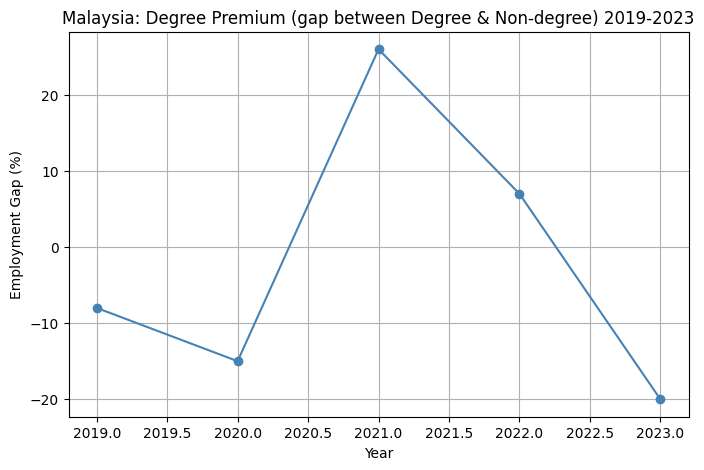

In [248]:
%pip install matplotlib

import matplotlib.pyplot as plt

data_plot = gap.loc["Malaysia"]["employment_gap"]

data_plot.plot(
    marker='o', 
    figsize=(8, 5), 
    color='steelblue'
)

plt.title("Malaysia: Degree Premium (gap between Degree & Non-degree) 2019-2023")
plt.ylabel("Employment Gap (%)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

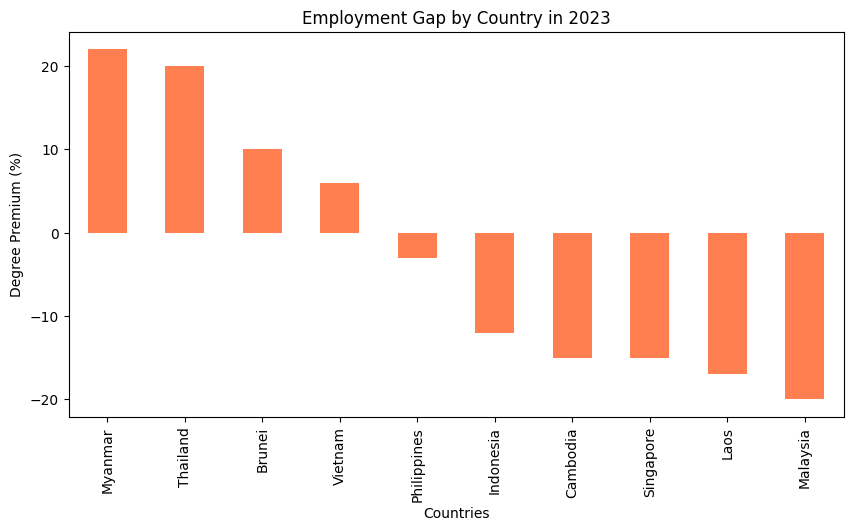

In [258]:
gap_2023 = gap.xs(2023, level="years") #Select year 2023

gap_2023["employment_gap"].sort_values(ascending=False).plot(
    kind='bar' ,figsize=(10,5),color='coral'
)

plt.title("Employment Gap by Country in 2023")
plt.ylabel("Degree Premium (%)")
plt.xlabel("Countries")
plt.show()